In [1]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "mpi-vs-openmp-by-core"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_5mm_17810_mpi-vs-openmp_by-core.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

Number_Procs  P1_OpenMP-By-Core  P1_MPI-By-Core  P2_OpenMP-By-Core  P2_MPI-By-Core  P4_OpenMP-By-Core  P4_MPI-By-Core
0             1                1.0             1.0                1.0             1.0                1.0             1.0
1             2                1.6             1.9                1.8             1.8                1.6             1.9
2             4                2.9             3.8                3.5             3.8                3.2             3.7
3             8                4.9             7.3                6.5             6.9                5.6             7.1
4            16                6.3            12.8               10.3            12.1               10.9            12.5
5            20                5.5            16.8               11.9            14.9               12.3            15.9

In [2]:
# Rename columns
#df_speedup = df.rename(columns={"P1_SpeedUp": "P1", "P2_SpeedUp": "P2", "P4_SpeedUp": "P4"})
df.columns

Index(['Number_Procs', 'P1_OpenMP-By-Core', 'P1_MPI-By-Core',
       'P2_OpenMP-By-Core', 'P2_MPI-By-Core', 'P4_OpenMP-By-Core',
       'P4_MPI-By-Core'],
      dtype='object')

In [3]:
select_columns=['Number_Procs', 'P1_OpenMP-By-Core', 'P1_MPI-By-Core', 'P2_OpenMP-By-Core', 'P2_MPI-By-Core', 'P4_OpenMP-By-Core', 'P4_MPI-By-Core']

# linestyles = [':.', '--', '-.', ':', '-', '--']
# fig = df[select_columns].plot(
#     kind='line', 
#     x='Number_Procs', 
#     style=linestyles, 
#     marker='o', 
#     markersize=14,
#     figsize=(10, 8)
# ).get_figure()

fig = plt.figure(figsize=(10,8))


plt.plot( 'Number_Procs', 'P1_MPI-By-Core'   , data=df, marker='o', color='blue', linewidth=4, linestyle='solid', markerfacecolor='blue', markersize=14)
plt.plot( 'Number_Procs', 'P2_MPI-By-Core'   , data=df, marker='X', color='green' , linewidth=3, linestyle='solid', markersize=14)
plt.plot( 'Number_Procs', 'P4_MPI-By-Core'   , data=df, marker='>', color='skyblue' , linewidth=3, linestyle='solid', markersize=14)
plt.plot( 'Number_Procs', 'P1_OpenMP-By-Core', data=df, marker='s' , color='red'     , linewidth=3, linestyle='solid', markersize=14)
plt.plot( 'Number_Procs', 'P2_OpenMP-By-Core', data=df, marker='v' , color='olive', linewidth=3, linestyle='solid', markersize=14)
plt.plot( 'Number_Procs', 'P4_OpenMP-By-Core', data=df, marker='d' , color='brown'      , linewidth=3, linestyle='solid', markersize=14)


plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20], [1, 2, 4, 8, 16, 20], fontsize=22)
plt.yticks([1, 2, 4, 8, 16, 20], [1, 2, 4, 8, 16, 20], fontsize=22)

lines = [1, 2, 4, 8, 16, 20]
for i in lines:
    plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number of Cores', fontsize=25)
plt.ylabel('Speedup', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.00, .54), frameon = True, fontsize=22)
#plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [4]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [5]:
#   Leitura do csv para pandas eficiencai
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_5mm_17810_mpi-vs-openmp_by-core_efficiency.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

Number_Procs  P1_OpenMP-By-Core  P1_MPI-By-Core  P2_OpenMP-By-Core  P2_MPI-By-Core  P4_OpenMP-By-Core  P4_MPI-By-Core
0             1               1.00            1.00               1.00            1.00               1.00            1.00
1             2               0.78            0.95               0.92            0.92               0.81            0.94
2             4               0.72            0.96               0.87            0.94               0.80            0.92
3             8               0.61            0.91               0.82            0.87               0.69            0.89
4            16               0.40            0.80               0.64            0.76               0.68            0.78
5            20               0.27            0.84               0.59            0.74               0.61            0.80

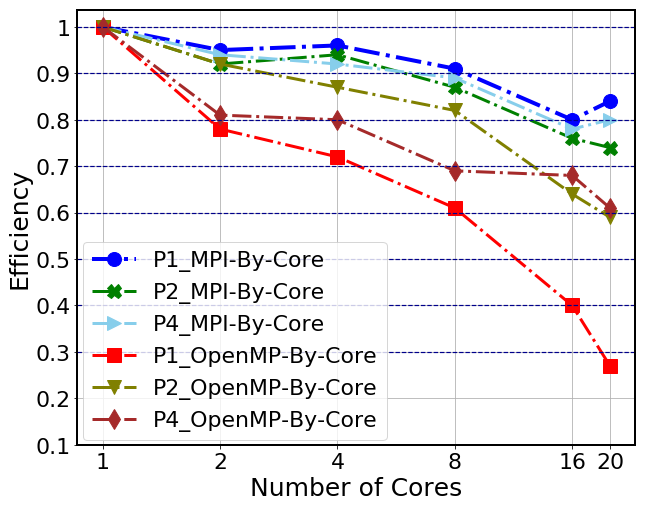

In [6]:
select_columns=['Number_Procs', 'P1_OpenMP-By-Core', 'P1_MPI-By-Core', 'P2_OpenMP-By-Core', 'P2_MPI-By-Core', 'P4_OpenMP-By-Core', 'P4_MPI-By-Core']

fig = plt.figure(figsize=(10,8))

plt.plot( 'Number_Procs', 'P1_MPI-By-Core'   , data=df, marker='o', color='blue', linewidth=4, linestyle='dashdot', markerfacecolor='blue', markersize=14)
plt.plot( 'Number_Procs', 'P2_MPI-By-Core'   , data=df, marker='X', color='green' , linewidth=3, linestyle='dashdot', markersize=14)
plt.plot( 'Number_Procs', 'P4_MPI-By-Core'   , data=df, marker='>', color='skyblue' , linewidth=3, linestyle='dashdot', markersize=14)
plt.plot( 'Number_Procs', 'P1_OpenMP-By-Core', data=df, marker='s' , color='red'     , linewidth=3, linestyle='dashdot', markersize=14)
plt.plot( 'Number_Procs', 'P2_OpenMP-By-Core', data=df, marker='v' , color='olive', linewidth=3, linestyle='dashdot', markersize=14)
plt.plot( 'Number_Procs', 'P4_OpenMP-By-Core', data=df, marker='d' , color='brown'      , linewidth=3, linestyle='dashdot', markersize=14)


plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20], [1, 2, 4, 8, 16, 20], fontsize=22)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], fontsize=22)

lines = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in lines:
    plt.axhline(i, linestyle='--', color='darkblue', linewidth='1.2') 

plt.xlabel('Number of Cores', fontsize=25)
plt.ylabel('Efficiency', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.01, 0.01), frameon = True, fontsize=22)
#plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [7]:
fname = "mpi-vs-openmp-by-core_efficiency"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>